# <span style="color:purple; font-weight:bold">Random Forest</span>

Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode(majority) of the classes (classification) or the mean prediction (regression) of the individual trees . It builds many "random" trees to create a robust and accurate model. 

<span style="color:purple; font-weight:bold">We are using it as a Classification Algorithm here !</span>


## <span style="color:purple; font-weight:bold">Key Concepts</span>      

- <span style="color:blue; font-weight:bold">Ensemble Learning:</span> The core idea of combining the predictions from multiple models (trees) to improve the overall accuracy and stability over a single model.      

- <span style="color:blue; font-weight:bold">Decision Trees:</span> The foundational element of the forest. Each tree is trained on a different subset of data and features.        

- <span style="color:blue; font-weight:bold">Bagging (Bootstrap Aggregating):</span> The method used to create different training subsets for each tree. It involves randomly sampling data with replacement.           

- <span style="color:blue; font-weight:bold">Feature Randomness (Subspace Sampling):</span> When building each tree, only a random subset of features is considered at each split point, ensuring the trees are diverse and less correlated.                

- <span style="color:blue; font-weight:bold">Voting:</span> For classification, the final output is determined by a majority vote among all the trees' predictions.               

---

<img src="./assets/images/Random_Forest_1.png" style="margin-top:20px"/>
<img src="./assets/images/Random_Forest_3.gif" style="margin-top:20px">

---

You can check out the below link to learn about different parameters of sklearn's Random Forest Model.          
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


For better visualization check out the follwing IBM video.             
    https://youtu.be/gkXX4h3qYm4?si=16wrph-jr2zzQXQc                
    https://youtu.be/J4Wdy0Wc_xQ?si=V0I20qwnBlaPq1o4                

For the basic maths behind Random Forest check out the following short article.             
    https://ranasinghiitkgp.medium.com/mathematics-behind-random-forest-and-xgboost-ea8596657275


**Digits Dataset from sklearn**

In [50]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [51]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

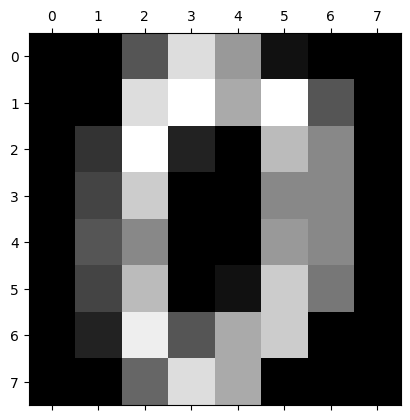

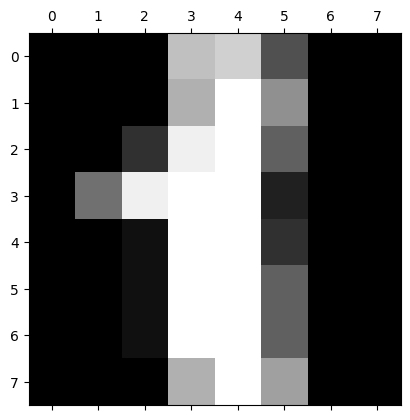

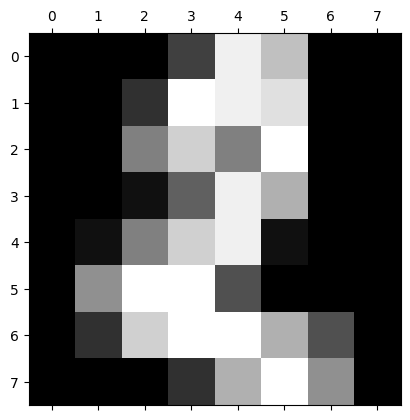

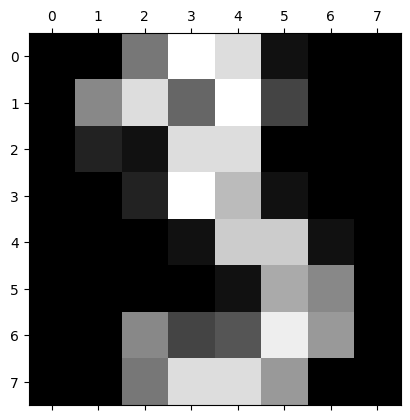

In [53]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [54]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [55]:
df['target'] = digits.target

In [56]:
df[0:12]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


**Train and predicting using model**

In [57]:
X = df.drop('target', axis='columns')
y = df.target

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
model.score(X_test, y_test) 

0.9583333333333334

** I am plotting Confusion Matrix to evaluate my model accuracy**

In [61]:
y_predicted = model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted )
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  1,  3,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  1,  1, 28,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 32,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 27]])

** Using seaborn for better graph**

Text(95.72222222222221, 0.5, 'Truth')

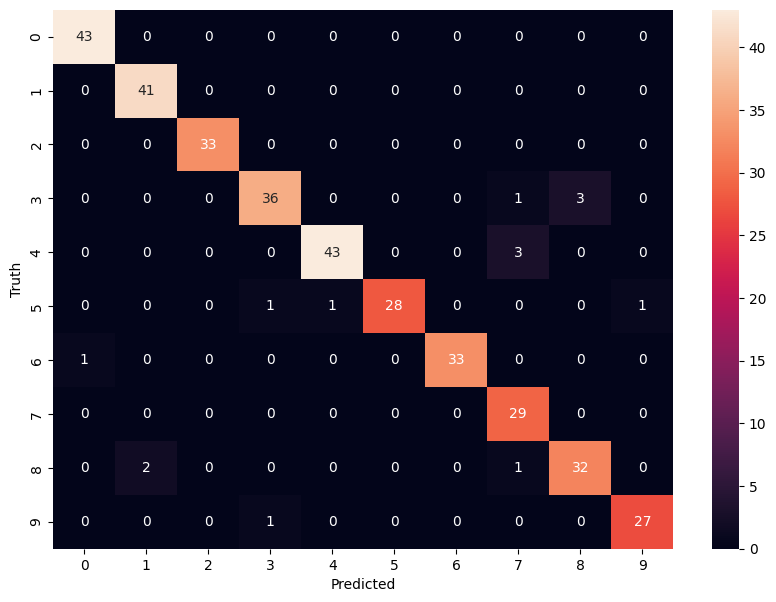

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth') 